In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [2]:
absorb = pd.read_csv('data/o2_gasmas/Absorbance_O2_HITRAN_X0.21T300KP1atmL200cm.csv', sep=",", header=1)
absorb.columns = ['Wavenumber', 'Absorbance']
linest = pd.read_csv('data/o2_gasmas/Lines_O2_HITRAN_ X0.21T300KP1atm.csv', sep=",", header=1)
linest.columns = ['Wavenumber', 'Linestrength']

In [3]:
tau=[6.82272,17.98063, 38.41827, 46.88217]
nue=[13114.096,13112.011,13107.623,13105.611]

In [4]:
poly_coef = np.polyfit(tau, nue, deg=2)
print(poly_coef)
poly=np.poly1d(poly_coef)
print(poly)
scantau=np.linspace(0., 50., 2500000)
nuefit=poly(scantau)

[-8.47259598e-04 -1.66435250e-01  1.31152731e+04]
            2
-0.0008473 x - 0.1664 x + 1.312e+04


In [5]:
data0f = pd.read_csv('data/o2_gasmas/C2_2023_05_25_19-10_GASMAS_50-200mV(0-150mV)_T1,36V vyduch 100 procent00000.txt', sep=",", header=5)
data0f.columns = ["tau", "s0f"]

data2f = pd.read_csv('data/o2_gasmas/C1_2023_05_25_19-10_GASMAS_50-200mV(0-150mV)_T1,36V vyduch 100 procent00000.txt', sep=",", header=5)
data2f.columns = ["tau", "s2f"]

data2fnorm = data2f['s2f']/data0f['s0f']
tau2nue = poly_coef[2] + poly_coef[1] * data2f['tau'] + poly_coef[0] * data2f['tau'] * data2f['tau'] 

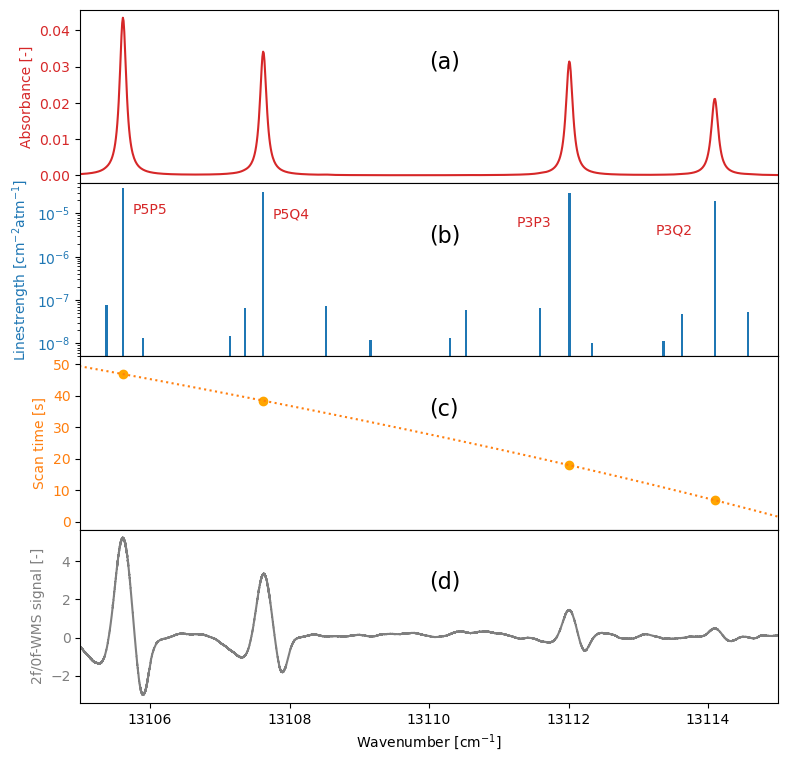

In [6]:
_, (ax1, ax2, ax3,ax4) = plt.subplots(4, sharex=True, gridspec_kw={'hspace': 0})
color1 = 'tab:red'
ax1.set_xlabel("Wavenumber $[cm^{-1}]$")
ax1.set_ylabel('Absorbance [-]', color=color1)
ax1.plot(absorb['Wavenumber'], absorb['Absorbance'], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.annotate('(a)', xy=(0.5, 0.5), xytext=(0.5, 0.66), xycoords='axes fraction', size=16)

color2 = 'tab:blue'
ax2.set_ylabel('Linestrength [cm$^{-2}$atm$^{-1}$]', color=color2)  # we already handled the x-label with ax1
ax2.bar(linest['Wavenumber'], linest['Linestrength'], log = True, linewidth=0.1, width=0.033, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.axis([13105, 13115, 5e-9, 5e-5])
ax2.annotate('(b)', xy=(0.5, 0.5), xytext=(0.5, 0.66), xycoords='axes fraction', size=16)

ax2.annotate('P5P5', xy=(13105.611, 1e-5), xytext=(13105.75, 1e-5), color=color1)
ax2.annotate('P5Q4', xy=(13107.623, 1e-5), xytext=(13107.75, 0.75e-5), color=color1)
ax2.annotate('P3P3', xy=(13112.011, 1e-5), xytext=(13111.25, 0.5e-5), color=color1)
ax2.annotate('P3Q2', xy=(13114.096, 1e-6), xytext=(13113.25, 0.33e-5), color=color1)

color3= 'tab:orange'
ax3.scatter(nue, tau, color='orange')
ax3.plot(nuefit, scantau, linestyle=':', color=color3)
ax3.set_xlabel("Wavenumber $[cm^{-1}]$")
ax3.set_ylabel('Scan time [s]', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.annotate('(c)', xy=(0.5, 0.5), xytext=(0.5, 0.66), xycoords='axes fraction', size=16)

color4= 'tab:gray'
ax4.plot(tau2nue, -data2fnorm, color=color4)
ax4.set_xlabel("Wavenumber [cm$^{-1}]$")
ax4.set_ylabel('2f/0f-WMS signal [-]', color=color4)
ax4.tick_params(axis='y', labelcolor=color4)
ax4.annotate('(d)', xy=(0.5, 0.5), xytext=(0.5, 0.66), xycoords='axes fraction', size=16)

plt.gcf().set_size_inches(9,9)
plt.savefig("2f-wms_A-band.pdf", dpi=1000, bbox_inches='tight')

plt.show()